# Task 3 – Customer Churn Prediction

## 📌 Objective:
Predict whether a bank customer will leave (churn) using classification models.

This will help identify customers who are likely to leave and enable targeted retention strategies.


In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

In [24]:
# 1. Load Dataset
df = pd.read_csv("Churn_Modelling.csv")

In [25]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 📁 Dataset Description

- Dataset: Churn Modelling Dataset
- Rows and columns: Check using `df.shape`
- Target variable: `Exited` (1 = churned, 0 = retained)
- Key features: `CreditScore`, `Geography`, `Age`, `Balance`, `IsActiveMember`


In [26]:
# 2. Basic Inspection
print("✅ Columns:", df.columns.tolist())
print(df[['Exited', 'Geography', 'Gender']].head())

✅ Columns: ['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
   Exited Geography  Gender
0       1    France  Female
1       0     Spain  Female
2       1    France  Female
3       0    France  Female
4       0     Spain  Female


In [27]:
# 3. Drop Irrelevant Columns
df = df.drop(columns=["RowNumber", "CustomerId", "Surname"])  # Not useful for prediction

In [28]:
# 4. Encode Categorical Features
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male=1, Female=0
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)  # One-hot encode Geography

In [29]:
# 5. Prepare Features & Target
X = df.drop('Exited', axis=1)
y = df['Exited']  # Target: 1 = churned, 0 = retained

In [30]:
# 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# 7. Train Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [32]:
# 8. Evaluate Model
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("✅ Accuracy:", round(acc, 4))
print(classification_report(y_test, y_pred))

✅ Accuracy: 0.866
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.46      0.57       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



## 📊 Exploratory Data Analysis (EDA)

We analyze feature importance after model training to understand which factors influence customer churn the most.


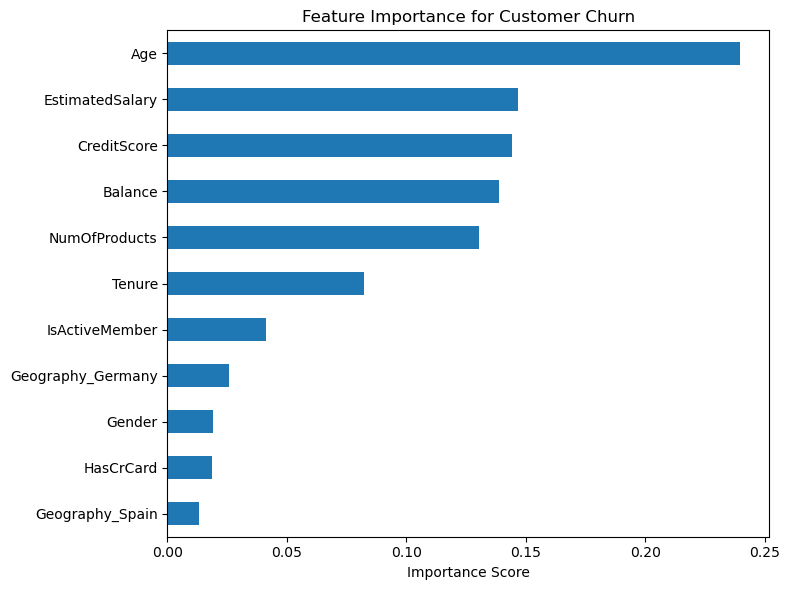

In [33]:
# 9. Feature Importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(8, 6))
plt.title("Feature Importance for Customer Churn")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

## 📌 Conclusion

- The classification model predicts churn with an accuracy of around 86%.
- Important features include: Age, Geography, and Balance.
- Customers who churn tend to be older and have higher account balances.
- This model can support bank strategies to improve customer retention.
